In [27]:
import pandas as pd
data= pd.read_csv('us-counties.csv')
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [28]:
#total number of cases due to covid
data['cases'].aggregate(['sum'])

sum    136901364
Name: cases, dtype: int64

In [29]:
#total number of deaths due to covid
data['deaths'].aggregate(['sum'])

sum    7461870
Name: deaths, dtype: int64

In [30]:

#drop fips column
data = data.drop(['fips'], axis=1) 



In [31]:
#group the data by state and find the total sum of deaths and cases occured in that state 
df = data.groupby('state').sum()
df.head()

,cases,deaths
state,,
Alabama,1382688,44178
Alaska,46739,739
Arizona,2021521,65853
Arkansas,653062,10631
California,8790629,298789


In [32]:
#state with maximum number of cases
df[df['cases']== df['cases'].max()]

,cases,deaths
state,,
New York,30099658,2269310


In [33]:
#state with minimum number of cases
df[df['cases']== df['cases'].min()]

,cases,deaths
state,,
Northern Mariana Islands,1874,180


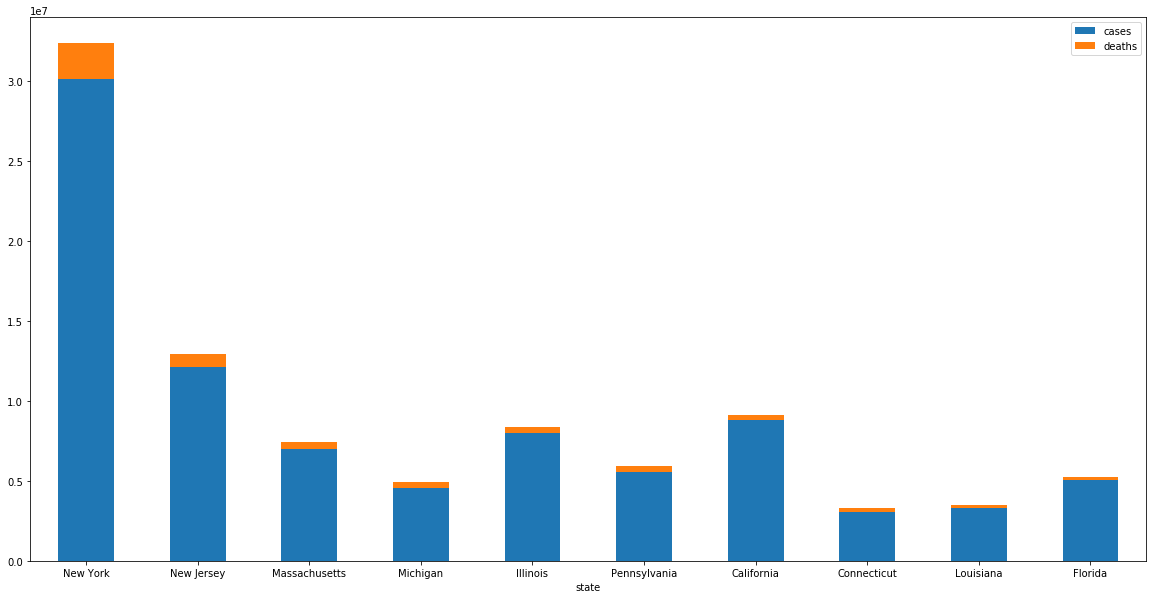

In [34]:
#plotted the graph to see the top 10 cities with maximum number of deaths
df.sort_values('deaths', ascending=False)[:10].plot.bar(stacked=True,figsize=(20,10), rot=0)

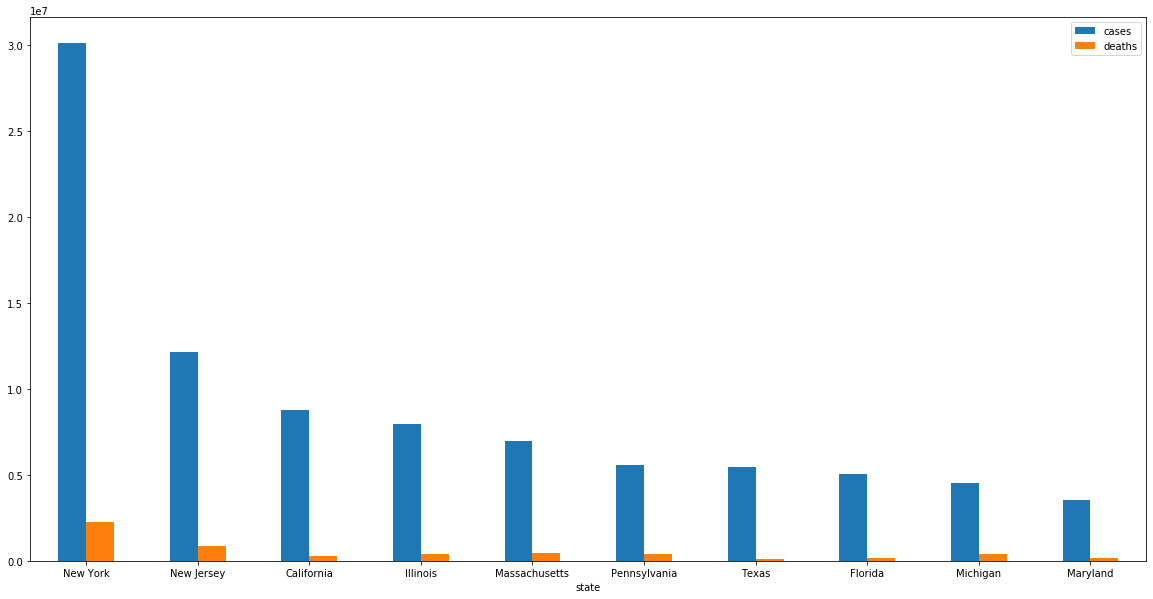

In [35]:
#plotted the graph to see the top 10 cities with maximum number of deaths
df.sort_values('cases', ascending=False)[:10].plot.bar(figsize=(20,10), rot=0)

In [36]:
#CHecking which date maximum deaths occurr

data.groupby('date').sum().sort_values('deaths', ascending=False)[:10]

,cases,deaths
date,,
2020-07-02,2758808,128825
2020-07-01,2703213,128103
2020-06-30,2653280,127461
2020-06-29,2604915,126161
2020-06-28,2565444,125815
2020-06-27,2525928,125544
2020-06-26,2483568,125033
2020-06-25,2438070,124400
2020-06-24,2396914,121934


In [37]:
#In state max death occurred  on which date 

data.groupby(['state', 'date']).sum().sort_values('deaths', ascending=False)

cases  deaths
state    date                      
New York 2020-07-02  399642   31814
         2020-07-01  398770   31791
         2020-06-30  398142   31776
         2020-06-29  397684   31143
         2020-06-28  397293   31137
...                     ...     ...
Texas    2020-02-23       4       0
         2020-02-22       4       0
         2020-02-21       4       0
         2020-02-20       2       0
Alabama  2020-03-13       6       0

[6724 rows x 2 columns]

In [39]:
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
newest_date = data['date'].max()
data1 = data[data['date'] == newest_date].groupby('date').agg(sum)
data1.reset_index(inplace=True)
data1

,date,cases,deaths
0,2020-07-02,2758808,128825


In [40]:
c

In [41]:
data3 = data2.groupby('state').agg('sum').sort_values('cases', ascending=False)
data3.reset_index(inplace=True)

In [42]:
data3[['state', 'cases']].head(5)

,state,cases
0,New York,399642
1,California,248198
2,Texas,182260
3,New Jersey,174212
4,Florida,169098


In [43]:
#Mortality Rate
mortality_rate = data1['deaths']/data1['cases']*100
mortality_rate

0    4.669589
dtype: float64

In [44]:
data3['mortality rate'] = round((data3['deaths']/data3['cases'])*100, 2)
data3[['state', 'mortality rate']].head(10)


,state,mortality rate
0,New York,7.96
1,California,2.52
2,Texas,1.41
3,New Jersey,8.67
4,Florida,2.14
5,Illinois,4.92
6,Massachusetts,7.44
7,Pennsylvania,7.29
8,Arizona,2.02
9,Georgia,3.40


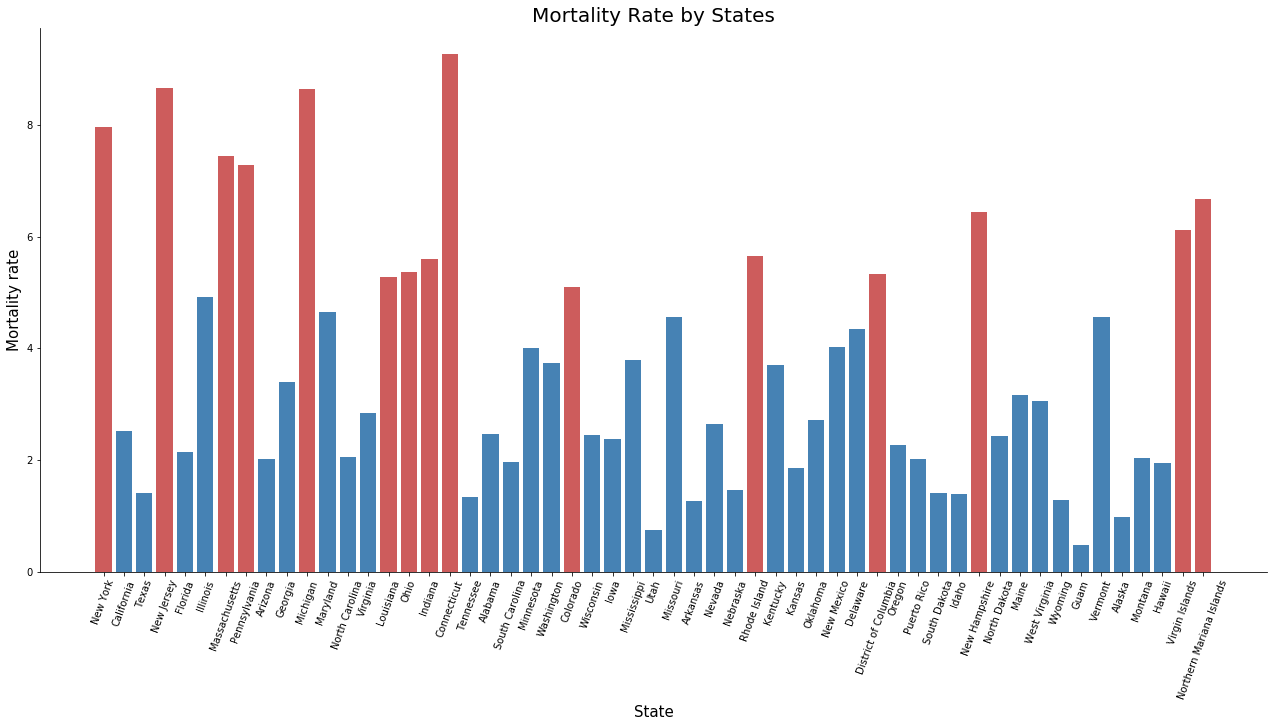

In [45]:
#Bar plot for mortality rate by states
fig, ax = plt.subplots(figsize=(22,10))
ax.tick_params(axis='x', rotation=70)
ax.bar(data3['state'], data3['mortality rate'], color=(data3['mortality rate'] < 5).map({True: 'steelblue',False: 'indianred'}))
ax.set_title('Mortality Rate by States', fontsize=20)
ax.set_ylabel('Mortality rate', fontsize=15)
ax.set_xlabel('State', fontsize=15)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)


In [86]:
#total cases by date in us

data4 = data.groupby(['date'])['cases'].sum().reset_index().sort_values('cases',ascending = True)

In [66]:
data4

,date,cases
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
3,2020-01-24,2
4,2020-01-25,3
...,...,...
159,2020-06-28,2565444
160,2020-06-29,2604915
161,2020-06-30,2653280
162,2020-07-01,2703213


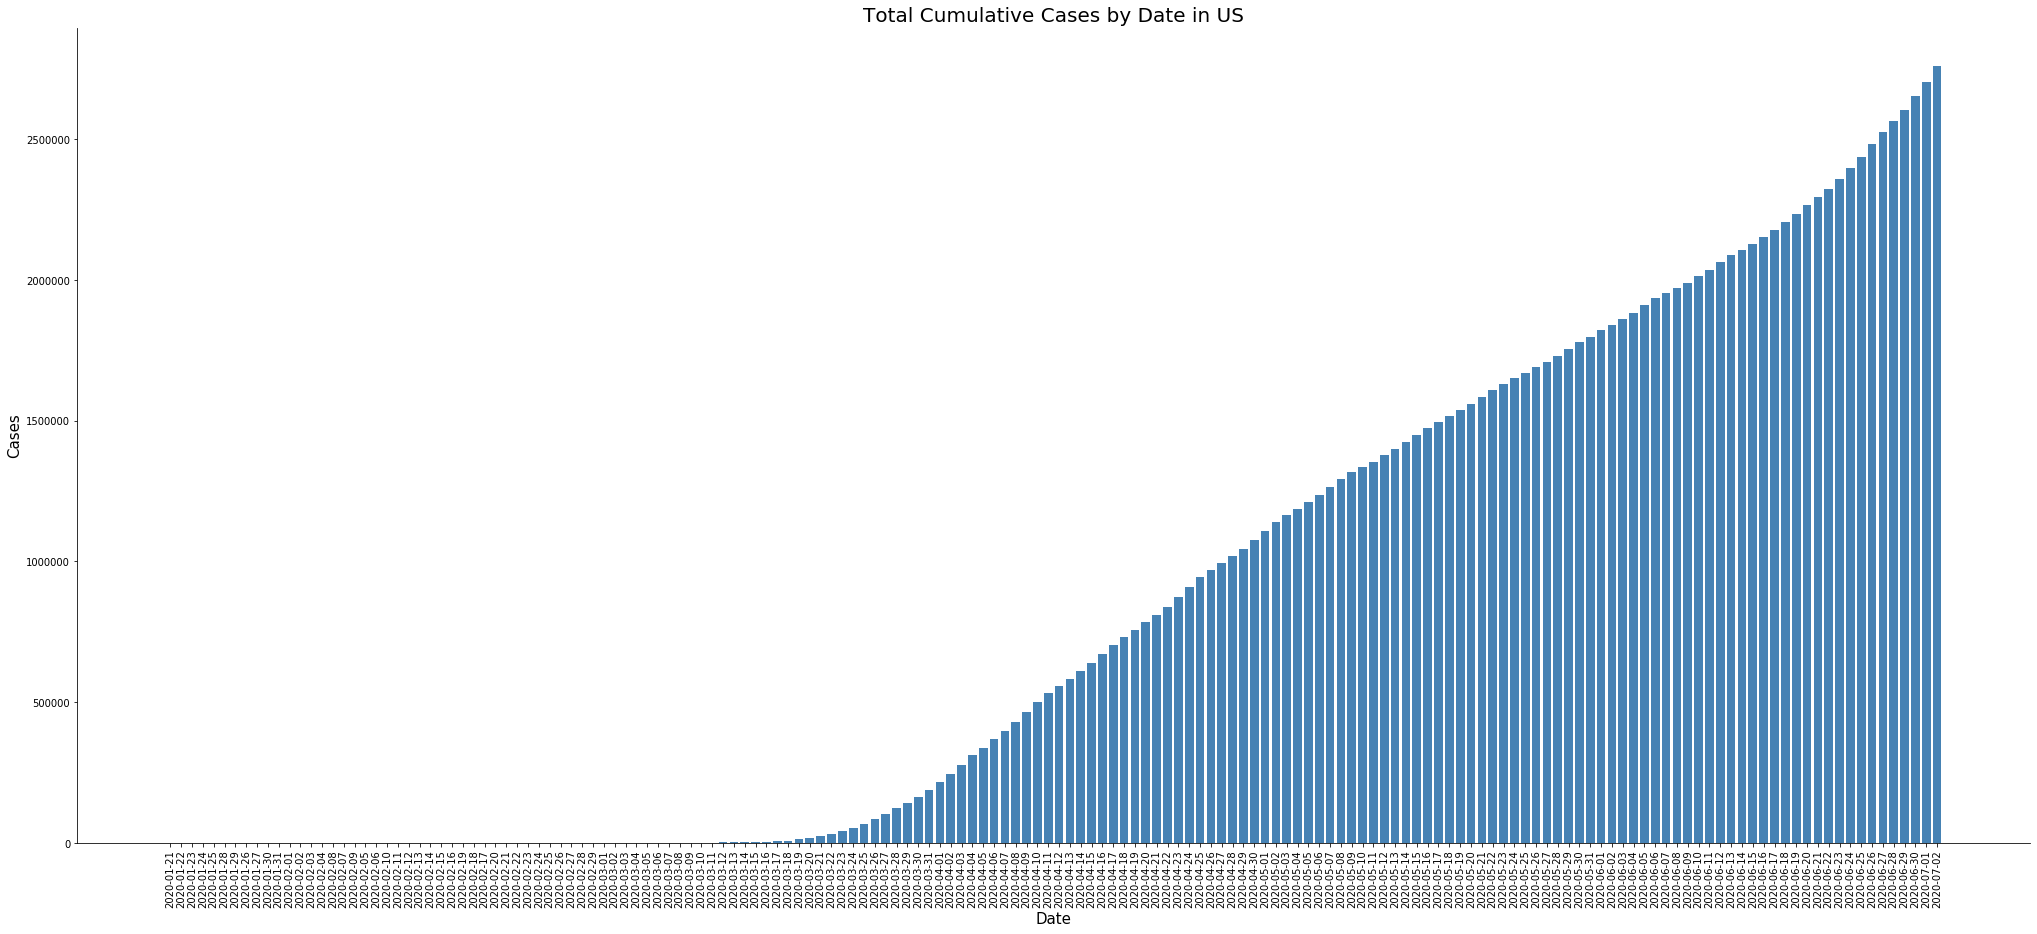

In [108]:
#graphing total cases by date in us

fig, ax = plt.subplots(figsize=(35,15))
ax.tick_params(axis='x', rotation=90)
ax.bar(data4['date'], data4['cases'], color= 'steelblue' )
ax.set_title('Total Cumulative Cases by Date in US', fontsize=20)
ax.set_ylabel('Cases', fontsize=15)
ax.set_xlabel('Date', fontsize=15)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)


In [87]:
#total deaths by date in us

data5 = data.groupby(['date'])['deaths'].sum().reset_index().sort_values('deaths',ascending = True)

data5

,date,deaths
0,2020-01-21,0
22,2020-02-12,0
23,2020-02-13,0
24,2020-02-14,0
25,2020-02-15,0
...,...,...
159,2020-06-28,125815
160,2020-06-29,126161
161,2020-06-30,127461
162,2020-07-01,128103


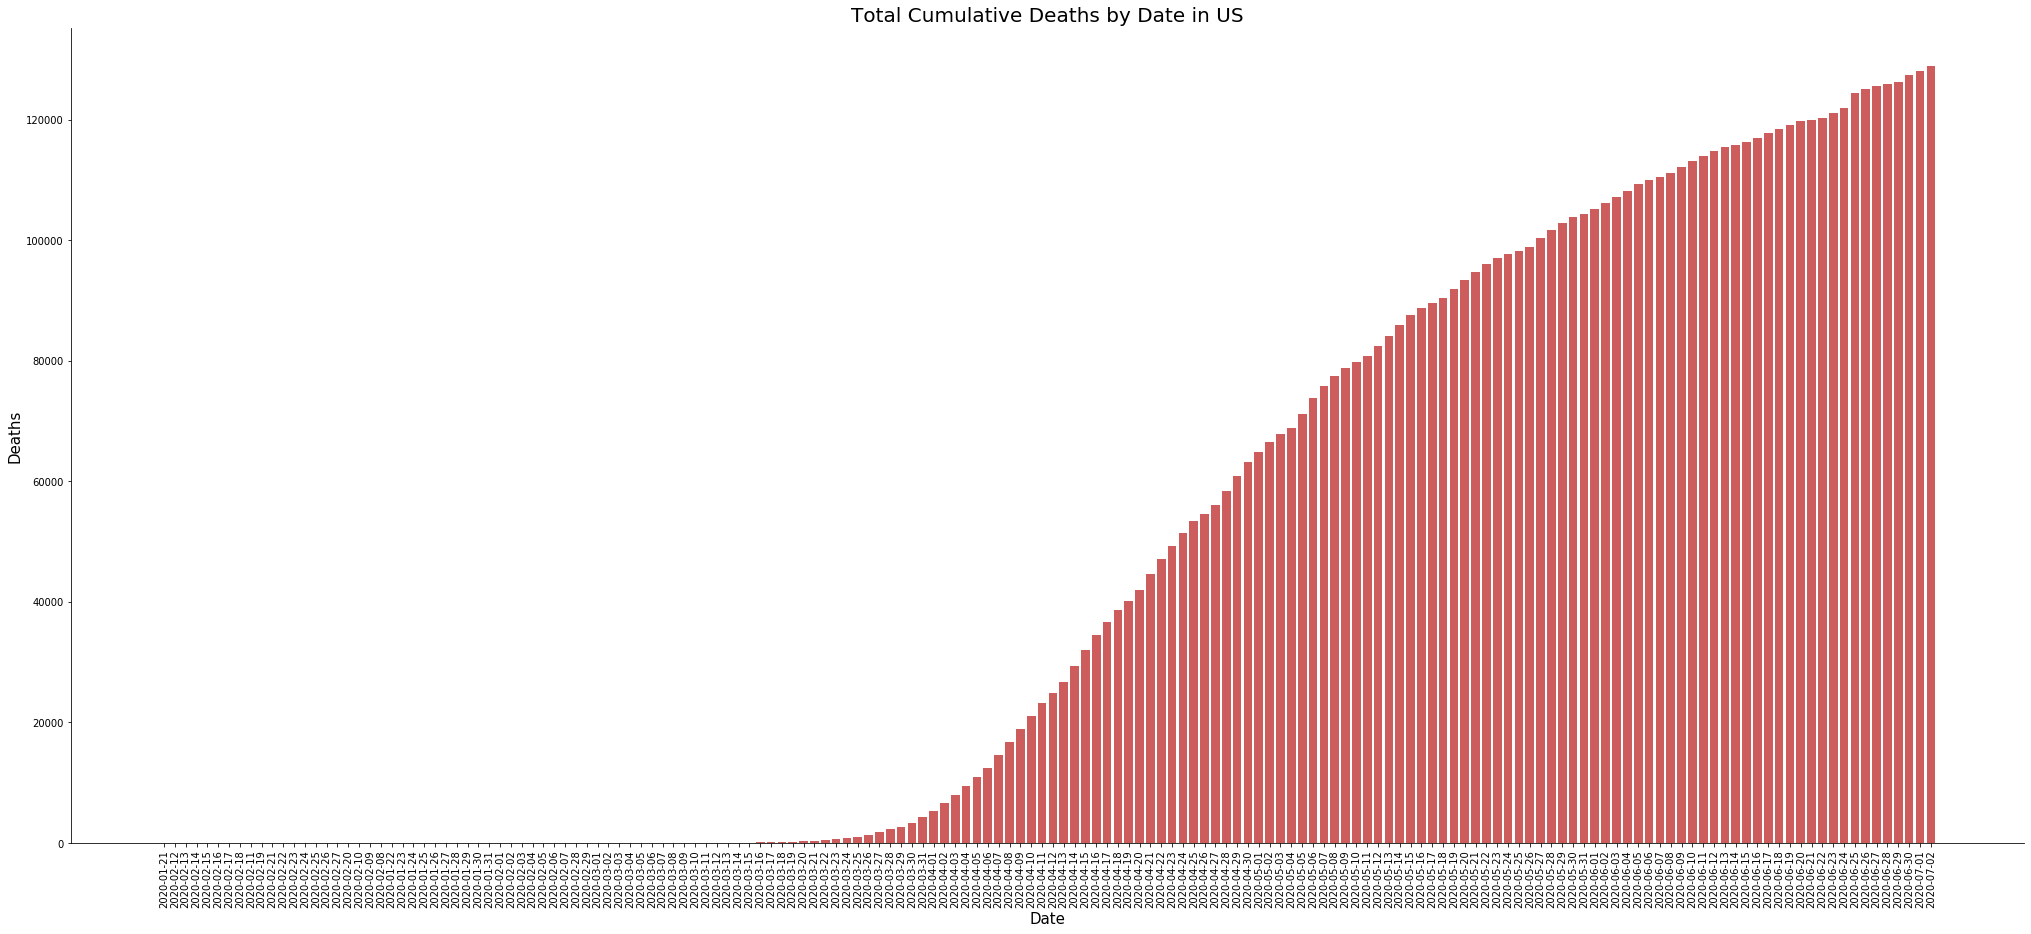

In [113]:
#graphing total deaths by date in us

fig, ax = plt.subplots(figsize=(35,15))
ax.tick_params(axis='x', rotation=90)
ax.bar(data5['date'], data5['deaths'], color= 'indianred' )
ax.set_title('Total Cumulative Deaths by Date in US', fontsize=20)
ax.set_ylabel('Deaths', fontsize=15)
ax.set_xlabel('Date', fontsize=15)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)


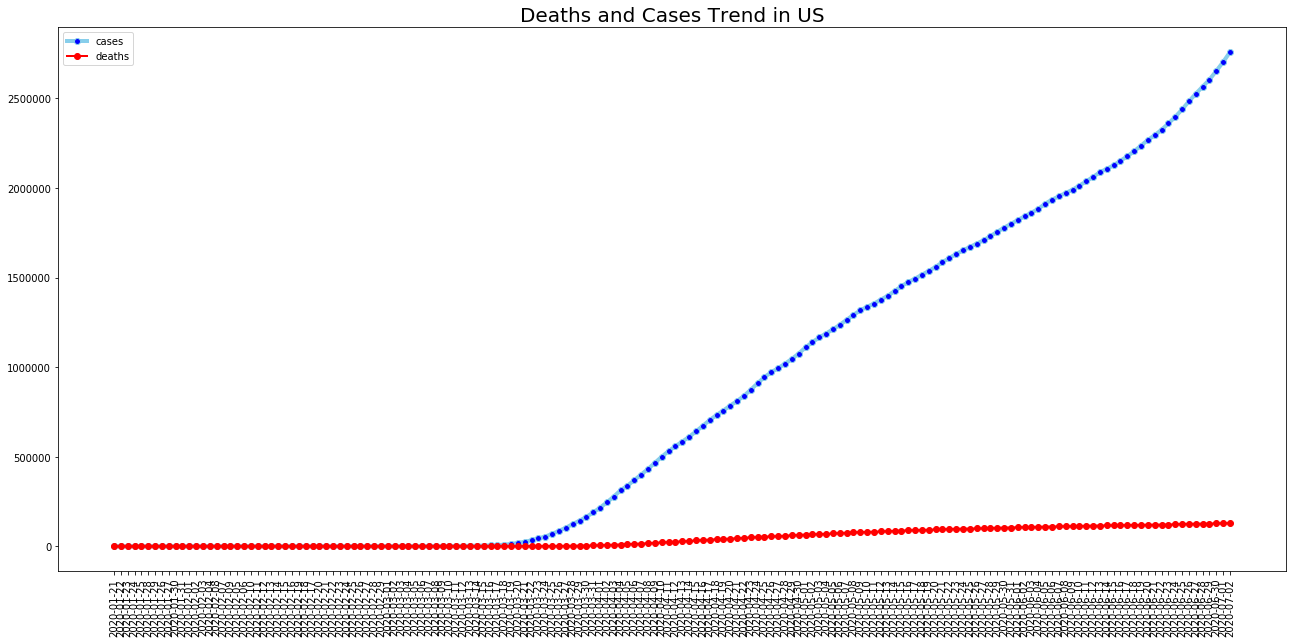

In [105]:
#cases and deaths trend in us

fig,ax = plt.subplots(figsize=(22,10))
ax.set_title('Deaths and Cases Trend in US', fontsize=20)
ax.tick_params(axis='x', rotation=90)
ax.plot( 'date', 'cases', data=data4, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4, label="cases")
ax.plot( 'date', 'deaths', data=data5, marker='o', markerfacecolor='red', markersize=6, color='red', linewidth=2, label="deaths")

plt.legend()


In [149]:
#weekly cases of each state

data6 = data.groupby('state').resample('W-Mon', on='date').sum().reset_index().sort_values(by='date')

In [150]:
data6

,state,date,cases,deaths
34,Arizona,2020-01-20,2,0
75,California,2020-01-20,5,0
260,Illinois,2020-01-20,4,0
936,Washington,2020-01-20,7,0
76,California,2020-01-27,24,0
...,...,...,...,...
716,Oklahoma,2020-06-29,42408,1171
188,Florida,2020-06-29,480513,10669
33,Alaska,2020-06-29,3530,36
959,Washington,2020-06-29,105720,4016


In [151]:
#weekly data of each county

data7 = data.groupby('county').resample('W-Mon', on='date').sum().reset_index().sort_values(by='date')

data7

,county,date,cases,deaths
22121,Snohomish,2020-01-20,7,0
14753,Maricopa,2020-01-20,2,0
14179,Los Angeles,2020-01-20,2,0
5743,Cook,2020-01-20,4,0
17765,Orange,2020-01-20,3,0
...,...,...,...,...
6591,Davie,2020-06-29,608,9
18558,Penobscot,2020-06-29,322,6
24978,Wadena,2020-06-29,45,0
18894,Pipestone,2020-06-29,82,3


In [152]:
#last week data of each state

newest_week = data6['date'].max()
data8 = data6[data6['date'] == newest_week]

data8

,state,date,cases,deaths
557,Nevada,2020-06-29,57604,1544
16,Alabama,2020-06-29,117118,2907
283,Illinois,2020-06-29,436609,21493
539,Nebraska,2020-06-29,57995,845
74,Arkansas,2020-06-29,64049,826
518,Montana,2020-06-29,3066,66
319,Iowa,2020-06-29,89029,2153
501,Missouri,2020-06-29,67955,3142
997,Wisconsin,2020-06-29,96906,2388
337,Kansas,2020-06-29,44998,838
